In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris['target_names'])
print(iris.target_names)

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
type(iris.data)

numpy.ndarray

In [7]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
feature_names = [name[:-5] for name in iris.feature_names]
df = pd.DataFrame(iris.data, columns=feature_names)
df['target']=iris.target #y data
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
import numpy as np
np.unique(iris.target, return_counts=True)
print(iris.DESCR) #자료 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
df.groupby('target').agg(['mean', 'std'])

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [16]:
import matplotlib.pyplot as plt
setosa = pd.DataFrame(iris.data[:50], columns=feature_names)
setosa.shape

(50, 4)

In [ ]:
setosa.T

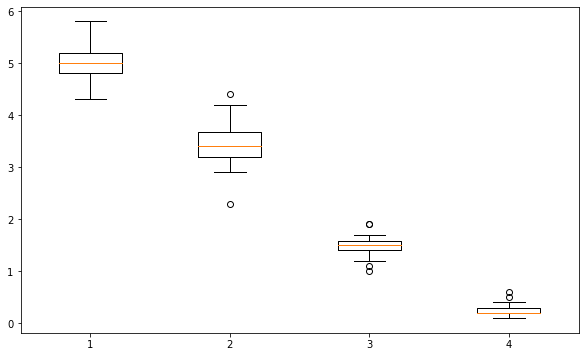

In [18]:
plt.figure(figsize=(10,6))
plt.boxplot(setosa.T)
plt.show()

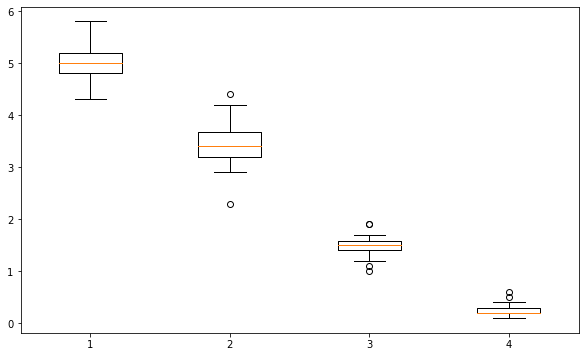

In [15]:
plt.figure(figsize=(10,6))
plt.boxplot(setosa.T)
plt.show()

In [19]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [21]:
# 학습 및 테스트 데이터로 분류

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=2021) # train : test = 3 : 1

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [22]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34, 36, 42]))

In [23]:
# y 값을 균등하게 뽑기 -> stratify 옵션 설정

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=2021) # train : test = 3 : 1
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [24]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38]))

In [25]:
# test size 비율을 20%로 설정

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [26]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [27]:
# 대문자는 클래스, 소문자는 함수

# 학습 - 결정트리(Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2022)

# 모델 하이퍼 파라미터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [28]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [29]:
# 예측
pred_dt=dtc.predict(X_test)

In [30]:
res=pd.DataFrame({'y':y_test, 'DT':pred_dt})
res.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


In [31]:
# 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9

In [32]:
# 예측 및 평가 동시 진행
dtc.score(X_test, y_test)

0.9

- SVM(Support Vector Machine)

In [33]:
# 모델 생성 및 학습
from sklearn.svm import SVC
svc = SVC(random_state=2022)
svc.fit(X_train, y_train)

SVC(random_state=2022)

In [34]:
# 예측
pred_sv=svc.predict(X_test)

In [35]:
# 평가
accuracy_score(y_test, pred_sv)

0.9

- Logistic Regression

In [42]:
# 모델 생성 및 학습
from scipy.sparse.construct import rand
from sklearn.linear_model import LogisticRegression

lrc2=LogisticRegression(random_state=2022, max_iter=500)
lrc2.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [43]:
# 예측
pred_lr = lrc2.predict(X_test)

--------기타

In [44]:
from sklearn.preprocessing import MinMaxScaler
iris_scaled=MinMaxScaler().fit_transform(iris.data)
iris_scaled[:5] # 0~1 사이의 값으로 scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [45]:
# y값은 변화시키지 않을 것이므로 return 받지 않는다 -> _ 사용
X_train2, X_test2, _, _ = train_test_split(iris_scaled, iris.target, stratify=iris.target, test_size=0.2, random_state=2022)

In [46]:
lrc2.fit(X_train2, y_train)

LogisticRegression(max_iter=500, random_state=2022)

--------기타 끝

In [47]:
# 평가
accuracy_score(y_test, pred_lr)

0.9333333333333333